Project 2: Clustering of Iris Flowers
Input: Iris.csv data set
Project: Clustering models using K-Means, DBSCAN, etc. unsupervised Machine Learning algorithms

Step 1: Import all necessary libraries
The following libraries to be imported in this project:
    pandas: Used to read and manipulate CSV data.
    Numpy: For fast and efficient processing of data
    sklearn.dataset: To load data from the Sci-Kit-Learn repository
    sklearn.train_test_split: From scikit-learn, used to split data into training and testing sets.
    sklearn.preprocessing: For feature scaling/normalization
    sklearn.cluster: A package containing different clustering methods: KMeans, DBSCAN, AgglomerativeClustering.
    sklearn.mixture: A package containing Gaussian mixture model for clustering
    sklearn.accuracy_score: To calculate model accuracy.

In [2]:
import pandas as pd
import numpy as np

## The rest of the libraries will be loaded as and when required.

from sklearn.datasets import load_iris  # Importing the Iris dataset from sklearn

# Confirming successful import of required packages
print("Import of all necessary packages is successful")


Import of all necessary packages is successful


In [3]:
# Load the Iris dataset
iris = load_iris()                   
X, y = iris.data, iris.target        
# This is a library method defined i
# Take it as two-component: Data and
# Convert to DataFrame for better processing
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
# Preview the dataset: It si required as a customary step!
#print("Top 5 rows of the dataset:")
#print(df.head())
#print("Bottom 5 rows of the dataset:")
#print(df.tail())
#print("The columns present in the data frame
#print(df.columns)
#print("The information about the attributes
print(df.info())
#print("To check if the null entries are there")
#print(df.isnull())
#print("The statistical information about the data")
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


Step 3: Split the data set into two parts: "Training set" and "Test set"
The following library is used
    import train_test_split from sklearn.model_selection
    "Training set" is used to train a model and "Test set" is used to test a model

Concepts:
train_test_split() splits data into two parts:

Training Set (X_train, y_train): Used for training the model.

Testing Set (X_test, y_test): Used for evaluating model performance.

test_size=0.33 → 33% of the data is used for testing.

train_size=0.67 → 67% of the data is used for training.

If random_state is set (e.g., random_state=42), the split is reproducible.

Why is this important?
Ensures the model is trained on one part of the dataset and tested on unseen data.

Helps assess how well the model generalizes to new data

In [4]:
from sklearn.model_selection import train_test_split

print('Import of "Train-Test-Split-Selection" library is successful')

# Split the dataset into training and testing sets: 67% for training and 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67, random_state=42)

# Note 1: Data (i.e., feature attributes and target column) are kept separate for model training.
# Note 2: Here, random_state=42 is chosen as a seed value, which is popularly used for reproducibility.

print("\nTrain and test data shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Import of "Train-Test-Split-Selection" library is successful

Train and test data shapes:
X_train: (100, 4) X_test: (50, 4)


Step 4: Preprocessing
The preprocessing task includes
(a)Handling null-entries, if applicable
(b) Scaling (to put all values in a normalize scale)
For scaling there are many methods: StandardScalar, MinMaxScalar, Normalizer, PolynomialFeatures, etc. Use any one.

Data Preprocessing and Normalization
Before applying machine learning algorithms, it's crucial to scale or normalize the data to improve model performance.

Why Normalize Data?
Features in a dataset can have different scales. For example, in the Iris dataset:

Sepal length (5-7 cm)

Petal length (1-6 cm)

If not normalized, features with large values (like petal length) may dominate smaller ones, leading to biased models.

3. Different Normalization Techniques
Your second code applies various feature scaling techniques using sklearn.preprocessing methods.

(A) Standardization using StandardScaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
Concept:
Standardization transforms the data so that it has zero mean and unit variance.
Formula: 𝑋′ = (𝑋−𝜇)/𝜎
where:
    μ is the mean of the feature,
    𝜎 is the standard deviation.

Best for: Most machine learning algorithms (like k-means, logistic regression, etc.), as it keeps the distribution shape.

(B) Min-Max Scaling using MinMaxScaler
    minmax_scaler = MinMaxScaler()
    X_train_minmax = minmax_scaler.fit_transform(X_train)
    X_test_minmax = minmax_scaler.transform(X_test)

Concept:
    Scales data between 0 and 1 using:
    𝑋′ = (𝑋 − 𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛)
 
Best for: Algorithms sensitive to feature magnitudes, such as KNN and neural networks.

(C) Normalization using Normalizer
    normalizer = Normalizer()
    X_train_normalized = normalizer.fit_transform(X_train)
    X_test_normalized = normalizer.transform(X_test)
Concept:
    Converts each data point into a unit vector.
    Each row is divided by its L2 norm (i.e., Euclidean distance).

𝑋′= 𝑋 /∥𝑋∥
​
Best for: Sparse datasets, clustering, and distance-based models like K-Means.

(D) Polynomial Feature Expansion using PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
Concept:
    Expands features by creating polynomial combinations (e.g., 𝑥1^2, 𝑥2^2, 𝑥1, 𝑥2).
Best for: Linear models to capture non-linear relationships.

In [5]:
# Normalization of training and testing data
'''
Note: For normalization, sklearn provides two methods: fit_transform() and transform().
    - fit_transform() is applied to training data, whereas transform() is applied to testing data.
    - fit_transform() is a combination of:
        * fit(): Calculates the necessary transformation parameters (e.g., min, max, mean, standard deviation).
        * transform(): Applies the transformation to scale the data based on those parameters.
    - transform() applies the same transformation to new data using the parameters learned from training data.
    - The three common normalization methods available in sklearn are:
        * Standard Scaling (StandardScaler)
        * Min-Max Scaling (MinMaxScaler)
        * Normalization (Normalizer)
'''

# Import scaling methods for normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures

# Standard Scaling (zero mean, unit variance)
scaler = StandardScaler()  # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform testing data using the same parameters

# Min-Max Scaling (scales data between 0 and 1)
minmax_scaler = MinMaxScaler()  
X_train_minmax = minmax_scaler.fit_transform(X_train)  # Fit and transform training data
X_test_minmax = minmax_scaler.transform(X_test)  # Transform testing data

# Normalization (scales each sample to unit norm)
normalizer = Normalizer()  
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Polynomial Features (expands feature set with polynomial terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Uncomment to display first 5 rows of each transformed dataset
# print("Standard Scaled Data (First 5 rows):\n", X_train_scaled[:5])
# print("\nMin-Max Scaled Data (First 5 rows):\n", X_train_minmax[:5])    
# print("\nNormalized Data (First 5 rows):\n", X_train_normalized[:5])
# print("\nPolynomial Features (First 5 rows):\n", X_train_poly[:5])


Step 5: Dimensionality reduction

Dimensionality reduction is the process of reducing the number of features (or variables) in a dataset while preserving as much important information as possible. It helps simplify data, remove noise, and improve the performance of machine learning models.

There are several methods defined in sklearn:
    1.  PCA (Principal Component Analysis), IDA (Independent Component Analysis),
        LDA (Linear Discrimnant Analysis), NMF (Non-negative Matrix Factorization), SVD
        (Singular Value Decomposition), etc. are a few popular dimensionality reduction techniques.
    2. This project follows PCA
    3. Note: Dimnsionality reduction method is optional and does not necessarily yield good results.

In [6]:
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. PCA (Principal Component Analysis) - Reducing dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform training data
X_test_pca = pca.transform(X_test_scaled)        # Transform test data
print("\nPCA Reduced Training data shape (2 components):", X_train_pca.shape)
print("PCA Reduced Testing data shape (2 components):", X_test_pca.shape)

# 2. LDA (Linear Discriminant Analysis) - Reducing dimensions to 2 (Supervised)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)  # Fit LDA model and transform training data
X_test_lda = lda.transform(X_test_scaled)                # Transform test data
print("\nLDA Reduced Training data shape (2 components):", X_train_lda.shape)
print("LDA Reduced Testing data shape (2 components):", X_test_lda.shape)

# 3. NMF (Non-Negative Matrix Factorization) - Requires non-negative input
nmf = NMF(n_components=2, init='random', random_state=42)
X_train_nmf = nmf.fit_transform(np.abs(X_train_scaled))  # Ensure non-negative values for NMF
X_test_nmf = nmf.transform(np.abs(X_test_scaled))
print("\nNMF Reduced Training data shape (2 components):", X_train_nmf.shape)
print("NMF Reduced Testing data shape (2 components):", X_test_nmf.shape)

# 4. SVD (Singular Value Decomposition) - Reducing dimensions to 2
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_scaled)  # Fit and transform training data
X_test_svd = svd.transform(X_test_scaled)        # Transform test data
print("\nSVD Reduced Training data shape (2 components):", X_train_svd.shape)
print("SVD Reduced Testing data shape (2 components):", X_test_svd.shape)


PCA Reduced Training data shape (2 components): (100, 2)
PCA Reduced Testing data shape (2 components): (50, 2)

LDA Reduced Training data shape (2 components): (100, 2)
LDA Reduced Testing data shape (2 components): (50, 2)

NMF Reduced Training data shape (2 components): (100, 2)
NMF Reduced Testing data shape (2 components): (50, 2)

SVD Reduced Training data shape (2 components): (100, 2)
SVD Reduced Testing data shape (2 components): (50, 2)


Explanation of above code:

Why Dimensionality Reduction?
    High-dimensional data can be noisy and redundant.
    Reducing dimensions speeds up computation and helps in better visualization (especially in 2D/3D).
    Some ML models perform better when redundant features are removed.
    
    Your code applies four different dimensionality reduction techniques:
        Principal Component Analysis (PCA)
        Linear Discriminant Analysis (LDA)
        Non-Negative Matrix Factorization (NMF)
        Singular Value Decomposition (SVD)

1. Principal Component Analysis (PCA)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
Concept:
PCA finds new orthogonal axes (principal components) that capture maximum variance.
These components are linear combinations of the original features.
    
Formula:
    𝑍 = 𝑋𝑊
where:
    𝑋 is the input data,
    𝑊 is the matrix of principal components.

Best for: Unsupervised dimensionality reduction in datasets with highly correlated features.

2. Linear Discriminant Analysis (LDA)
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA(n_components=2)
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    X_test_lda = lda.transform(X_test_scaled)
Concept:
    Unlike PCA, LDA is supervised: it finds axes that maximize class separation.
    Works by:
        Maximizing between-class variance.
        Minimizing within-class variance.

Best for: Classification tasks where you want to reduce dimensions while preserving class distinctions.

3. Non-Negative Matrix Factorization (NMF)
    from sklearn.decomposition import NMF
    nmf = NMF(n_components=2, init='random', random_state=42)
    X_train_nmf = nmf.fit_transform(np.abs(X_train_scaled))
    X_test_nmf = nmf.transform(np.abs(X_test_scaled))
Concept:
    Factorizes the data matrix 𝑋 into two non-negative matrices 𝑊 and 𝐻:
        𝑋 ≈ 𝑊𝐻
    Unlike PCA, which allows negative values, NMF enforces non-negativity, leading to part-based representations.

Best for: Feature extraction in text mining and image processing.

4. Singular Value Decomposition (SVD)
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=2)
    X_train_svd = svd.fit_transform(X_train_scaled)
    X_test_svd = svd.transform(X_test_scaled)

Concept:
Factorizes data into three matrices:
    𝑋 = 𝑈𝑆𝑉𝑇
 
where:
    𝑈 and V are orthogonal matrices,
    𝑆 contains singular values.

Similar to PCA but works without centering the data.

Best for: Text processing (e.g., Latent Semantic Analysis).

Comparison Table
Method	         Type	            Works on	               Use Case
PCA	             Unsupervised	    Variance	               General-purpose dimensionality reduction
LDA	             Supervised	        Class separation	       Classification problems
NMF	             Unsupervised	    Non-negative data	       Text, image feature extraction
SVD	             Unsupervised	    Factorization	           Text analysis (LSA), noise reduction

Step 6: Building Clustering Models
There are several ML algorithms that can be followed to build
clusters. In this project, we shall follow the following ML
algorithms.
k-Means clustering
DBSCAN clustering
Agglomerative clustering
Gaussian Mixture clustering
Clustering methods intiations:
km = KMeans(n_clusters=3, random_state=42)
db = DBSCAN(eps=0.5, min_samples=3)
am = AgglomerativeClustering(n_clusters=3)
gm = GaussianMixture(n_components=3, random_state=42)

K-Means Clustering Algorithm
The K-Means algorithm is an unsupervised learning technique used to partition data into K clusters based on feature similarity.

Algorithm Steps
1. Initialize K cluster centroids randomly
     Select K random points from the dataset as the initial centroids (cluster centers).

2. Assign each data point to the nearest cluster centroid
    Compute the Euclidean distance (or other distance metric) between each data point and all centroids.
    Assign each data point to the cluster of the nearest centroid.

3. Update the centroids
    For each cluster, compute the mean (average) of all points assigned to it.
    The new mean becomes the updated centroid.

4. Repeat steps 2 and 3 until convergence
    Continue reassigning points and updating centroids until:
        Centroids do not change, OR
        A maximum number of iterations is reached.

5. Return the final clusters
    Each data point is assigned a final cluster label based on the last centroid assignment.

Mathematical Formulation
    Centroid Initialization: Choose K initial cluster centers randomly from the dataset.
    Cluster Assignment Step: Assign each point xi to the nearest cluster center Cj:
        𝐶(𝑥𝑖)=arg min𝑗∥𝑥𝑖−𝜇𝑗∥^2
 
where:
    𝑥𝑖 is a data point,
    𝜇𝑗 is the centroid of cluster 
    ∥⋅∥^2 represents the Euclidean distance.

Centroid Update Step:
    Update each cluster centroid as the mean of all assigned points:
        𝜇𝑗 = (1/𝑁𝑗)∑𝑥𝑖 where 𝑥𝑖 ∈ 𝐶𝑗
    where 𝑁𝑗 is the number of points in cluster 
Repeat until the centroids no longer change significantly.

Advantages of K-Means
✅ Simple & efficient: Works well on large datasets.
✅ Scalable: Runs fast on high-dimensional data.
✅ Interpretable: Produces easy-to-understand clusters.

Disadvantages of K-Means
❌ Sensitive to initial centroids: Poor initialization may lead to bad clustering.
❌ Assumes spherical clusters: Doesn't work well with non-circular clusters.
❌ Needs predefined K: You must specify K in advance.

In [ ]:
# KMeans clustering algorithms
# Import clustering models
from sklearn.cluster import KMeans
# Clustering: build clustering with "training data set"
km = KMeans(n_clusters=3, random_state=42)
# n_clusters=3: Specifies that we want to create 3 clusters (because the Iris dataset has 3 species of flowers). random_state=42: Ensures reproducibility (so we get the same clusters every time we run the code).

km.fit(X_train_scaled)    
# The .fit() method trains the KMeans model on the scaled training data (X_train_scaled). The model learns the centroids (cluster centers) for the 3 clusters.                         
# Learn the clustering

km_labels = km.predict(X_test_scaled)
# The .predict() method assigns each test sample (X_test_scaled) to one of the 3 clusters learned from the training data.
print("\nKMeans Cluster Labels (First 10):", km_labels[:10])

'''
    This prints the first 10 cluster labels assigned to the test data points.
    The output values (e.g., [1, 2, 0, 1, ...]) indicate which cluster each test sample belongs to.
'''


KMeans Cluster Labels (First 10): [1 0 2 1 1 0 1 2 1 1]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


'\n    This prints the first 10 cluster labels assigned to the test data points.\n    The output values (e.g., [1, 2, 0, 1, ...]) indicate which cluster each test sample belongs to.\n'

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Algorithm
Introduction
    DBSCAN is an unsupervised clustering algorithm that groups together densely packed points and marks sparse regions as noise. Unlike K-Means, DBSCAN does not require specifying the number of clusters (K) beforehand.

Algorithm Steps
1. Define Key Parameters
    DBSCAN relies on two main parameters:
        eps (ε) → The maximum distance within which points are considered neighbors.
        min_samples → The minimum number of points required to form a dense cluster.

2. Core Concept: Point Classification
DBSCAN classifies points into three categories:
    Core Points: Have at least min_samples points within eps radius.
    Border Points: Are within eps of a core point but don’t have enough neighbors to be a core point.
    Noise Points (Outliers): Do not belong to any cluster (too far from any core point).

3. Algorithm Workflow
    Pick an unvisited point in the dataset.
    Check if it's a core point (has at least min_samples neighbors within eps).
        If YES, start a new cluster.
        If NO, mark it as noise (later reclassified if it becomes part of another cluster).
    Expand the cluster:
        Add all density-reachable points (those within eps of core points).
        Continue expanding until no new core points are found.

4. Repeat for remaining unvisited points until all points are clustered or marked as noise.

Mathematical Formulation
For a point p, define its ε-neighborhood as:
    𝑁(𝑝) = { 𝑞 ∈ 𝐷 ∣ 𝑑𝑖𝑠𝑡(𝑝, 𝑞) ≤ 𝜀}
where dist(p, q) is the Euclidean distance between p and q.

A point p is a core point if:
    ∣N(p)∣ ≥ min_samples i.e., it has at least min_samples points in its neighborhood.

Advantages of DBSCAN
✅ Does not require specifying K (unlike K-Means).
✅ Detects arbitrarily shaped clusters.
✅ Identifies outliers automatically.

Disadvantages of DBSCAN
❌ Struggles with varying densities—one eps value may not fit all clusters.
❌ Sensitive to eps and min_samples—bad choices lead to poor clustering.

Pseudocode of DBSCAN:
    1. Mark all points as unvisited.
    2. For each unvisited point P:
        a) Retrieve all points within `eps` (neighborhood).
        b) If `min_samples` neighbors are found:
            - Mark P as a **core point**.
            - Start a new cluster and expand it.
        c) If not enough neighbors:
            - Mark P as **noise**.
    3. Repeat until all points are visited.


In [8]:
from sklearn.cluster import DBSCAN
# Clustering: build clustering with "training data set"
db = DBSCAN(eps=0.5, min_samples=3)
db.fit(X_train_scaled)          # DBSCAN is density-based clustering, unl
# Using the test dataset to assign cluster labels (DBSCAN does not have '
db_labels = db.fit_predict(X_test_scaled)     # Predict the cluster label
print("\nDBSCAN Cluster Labels (First 10):", db_labels[:10])


DBSCAN Cluster Labels (First 10): [-1  1 -1 -1 -1  0 -1  3 -1 -1]


Agglomerative Clustering Algorithm
Introduction
Agglomerative Clustering is a type of hierarchical clustering that follows a bottom-up approach. It starts by treating each data point as an individual cluster and then repeatedly merges the closest clusters until the desired number of clusters (k) is reached.

Algorithm Steps
1. Define Key Parameters
  n_clusters → The number of clusters to form.
  linkage → Defines how to compute the distance between clusters:
  Single Linkage → Merges based on the closest point.
  Complete Linkage → Merges based on the farthest point.
  Average Linkage → Merges based on the mean distance between points in the clusters.
  Ward Linkage → Minimizes variance when merging (default).

2. Algorithm Workflow
  Start with each data point as an individual cluster.
  Compute pairwise distances between all clusters.
  Merge the two closest clusters (based on linkage criterion).
  Repeat step 3 until only n_clusters remain.

Mathematical Formulation
For two clusters A and B, define the distance between them as:

  Single Linkage (Min Distance)
    D(A,B)=min{d(a,b)∣a∈A,b∈B}
  
  Complete Linkage (Max Distance)
    D(A,B) = max{d(a,b)∣a∈A,b∈B}
  
  Average Linkage (Mean Distance)
    D(A,B) = 1/∣A∣∣B∣(a∈A)∑(b∈B)∑d(a,b)
  
  Ward Linkage (Minimizes Variance)
  D(A,B) = i∈A∪B∑(xi − x'A∪B)^2
 
  where 𝑥' is the centroid of the merged cluster.

Advantages of Agglomerative Clustering
✅ No need to specify K initially (dendrogram helps determine optimal clusters).
✅ Works well with small datasets.
✅ Hierarchical structure is useful for data interpretation.

Disadvantages of Agglomerative Clustering
❌ Computationally expensive for large datasets.
❌ Not suitable for complex shapes of clusters.
❌ Merging decisions are final (cannot be undone).

Pseudo Code:
  1. Start with each point as an individual cluster.
  2. Compute the distance between all pairs of clusters.
  3. Merge the two closest clusters.
  4. Repeat step 3 until only `n_clusters` remain.


In [10]:
# Agglomerative clustering algorithms
# Import clustering models
from sklearn.cluster import AgglomerativeClustering
# Clustering: build clustering with "training data set"
am = AgglomerativeClustering(n_clusters=3)
am.fit(X_train_scaled)                             # Learn the clustering
am_labels = am.fit_predict(X_test_scaled)
print("\nKMeans Cluster Labels (First 10):", am_labels[:10])


KMeans Cluster Labels (First 10): [2 0 1 2 1 0 2 1 2 2]


Gaussian Mixture Model (GMM) Clustering Algorithm
Introduction
    Gaussian Mixture Models (GMM) is a probabilistic clustering technique based on the assumption that data is generated from a mixture of multiple Gaussian distributions. Unlike K-Means, which uses hard clustering (assigning each point to one cluster), GMM uses soft clustering, meaning it assigns probability distributions to each data point for belonging to a cluster.

Algorithm Steps
    1. Define Key Parameters
        n_components → Number of Gaussian distributions (clusters).
        covariance_type → Determines the shape of clusters (e.g., spherical, diagonal, full).
        max_iter → Maximum iterations for the Expectation-Maximization (EM) algorithm.

    2. Algorithm Workflow (Expectation-Maximization)
        a. Initialize parameters (means, covariances, and mixture weights randomly or using K-Means).
        b. Expectation Step (E-step):
            Compute the probability that each point belongs to each Gaussian distribution using Bayes’ theorem.
        c. Maximization Step (M-step):
            Update the Gaussian parameters (mean, covariance, weight) to maximize the log-likelihood of the observed data.
        d. Repeat steps 2 and 3 until convergence (when parameters no longer change significantly).
        e. Assign cluster labels based on the highest probability for each data point.

Mathematical Formulation
Each cluster is represented as a Gaussian distribution, parameterized by:
    Mean (μ) → Center of the cluster.
    Covariance (Σ) → Shape and orientation of the cluster.
    Weight (π) → The proportion of data points in the cluster.
The probability of a data point 𝑋 belonging to a cluster 𝑘 is given by the multivariate Gaussian function:

Advantages of GMM
✅ Works well with non-circular clusters (unlike K-Means).
✅ Soft clustering (probabilistic assignment) gives more flexibility.
✅ Can capture more complex relationships between data points.

Disadvantages of GMM
❌ Sensitive to initialization (can lead to different solutions).
❌ Computationally expensive compared to K-Means.
❌ May converge to local optima (requires multiple runs for best results).

Pseudocode for Gaussian Mixture Model (GMM)
1. Initialize the Gaussian distributions (means, covariances, weights).
2. Compute probability of each point belonging to each Gaussian (E-step).
3. Update Gaussian parameters to maximize likelihood (M-step).
4. Repeat steps 2-3 until convergence.
5. Assign data points to the Gaussian with the highest probability.


In [11]:
# Gaussian Mixture clustering
# Import the packages
from sklearn.mixture import GaussianMixture
# Clustering: build clustering with "training data set"
gmm = GaussianMixture(n_components=3)
gmm.fit(X_train_scaled)
gmm_labels = gmm.predict(X_test_scaled)
print("\nGaussian Mixture Cluster Labels (First 10):", gmm_labels[:10])


Gaussian Mixture Cluster Labels (First 10): [2 1 0 2 2 1 2 0 0 2]


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Step 7: Evaluation of Clustering Performance
The following metrics are popular to validate clusuer quality
A. Silhouette Score 
    - Higher score is preferable
B. Davies-Bouldin Index
    - Lower score is preferable
 C. Calinski-Harabasz Index
    - Higher score is preferable

In [12]:
# Import the packages for the evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluation of k-Means clustering performance: Use the testing dataset
km_silhouette = silhouette_score(X_test_scaled, km_labels)
km_davies_bouldin = davies_bouldin_score(X_test_scaled, km_labels)
km_calinski_harabasz = calinski_harabasz_score(X_test_scaled, km_labels)

print("\nPerformance of k-Means clustering:")
print("Silhouette score: ", km_silhouette)
print("Davies_Bouldin Index: ", km_davies_bouldin)
print("Calinski_Harabasz Index: ", km_calinski_harabasz)

# Evaluation of DBSCAN clustering performance: Use the testing dataset
# Only calculate metrics if there is more than one cluster
if len(set(db_labels)) > 1:
    db_silhouette = silhouette_score(X_test_scaled, db_labels)
    db_davies_bouldin = davies_bouldin_score(X_test_scaled, db_labels)
    db_calinski_harabasz = calinski_harabasz_score(X_test_scaled, db_labels)

    print("\nPerformance of DBSCAN clustering:")
    print("Silhouette score: ", db_silhouette)
    print("Davies_Bouldin Index: ", db_davies_bouldin)
    print("Calinski_Harabasz Index: ", db_calinski_harabasz)
else:
    print("\nDBSCAN clustering resulted in a single cluster or noise. Performance metrics cannot be calculated.")

# Evaluation of Agglomerative clustering performance: Use the testing dataset
am_silhouette = silhouette_score(X_test_scaled, am_labels)
am_davies_bouldin = davies_bouldin_score(X_test_scaled, am_labels)
am_calinski_harabasz = calinski_harabasz_score(X_test_scaled, am_labels)

print("\nPerformance of Agglomerative clustering:")
print("Silhouette score: ", am_silhouette)
print("Davies_Bouldin Index: ", am_davies_bouldin)
print("Calinski_Harabasz Index: ", am_calinski_harabasz)

# Evaluation of GMM clustering performance: Use the testing dataset
gmm_silhouette = silhouette_score(X_test_scaled, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(X_test_scaled, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(X_test_scaled, gmm_labels)

print("\nPerformance of Gaussian Mixture Model clustering:")
print("Silhouette score: ", gmm_silhouette)
print("Davies_Bouldin Index: ", gmm_davies_bouldin)
print("Calinski_Harabasz Index: ", gmm_calinski_harabasz)



Performance of k-Means clustering:
Silhouette score:  0.4210004812765778
Davies_Bouldin Index:  0.9393158190308629
Calinski_Harabasz Index:  79.17686608604731

Performance of DBSCAN clustering:
Silhouette score:  0.0294764237159311
Davies_Bouldin Index:  2.0506227240487123
Calinski_Harabasz Index:  13.126853015201641

Performance of Agglomerative clustering:
Silhouette score:  0.43172777224345593
Davies_Bouldin Index:  0.898149198777876
Calinski_Harabasz Index:  79.45002644134509

Performance of Gaussian Mixture Model clustering:
Silhouette score:  0.36193119291457665
Davies_Bouldin Index:  1.186199212776613
Calinski_Harabasz Index:  67.45372348951881


Step 8: Visualization of clusters using tSNE plot

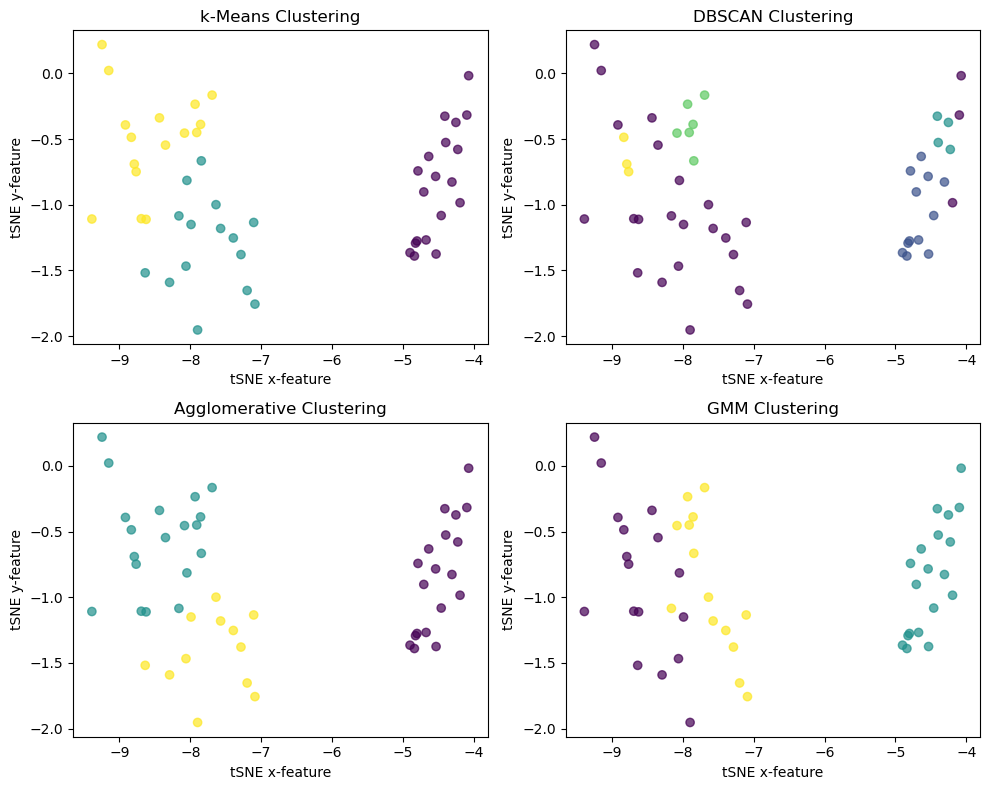

In [13]:
# Import the necessary packages for t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get your data ready...
tsne = TSNE(n_components=2, random_state=42)  # Initialize t-SNE
X_tsne = tsne.fit_transform(X_test_scaled)  # Apply t-SNE transformation

plt.figure(figsize=(10, 8))  # Define the size of your figure

# Visualization with t-SNE: k-Means graph
plt.subplot(2, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=km_labels, cmap="viridis", alpha=0.7)
plt.title("k-Means Clustering")
plt.xlabel('tSNE x-feature')
plt.ylabel('tSNE y-feature')

# Visualization with t-SNE: DBSCAN graph
plt.subplot(2, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=db_labels, cmap="viridis", alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel('tSNE x-feature')
plt.ylabel('tSNE y-feature')

# Visualization with t-SNE: Agglomerative Clustering graph
plt.subplot(2, 2, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=am_labels, cmap="viridis", alpha=0.7)
plt.title("Agglomerative Clustering")
plt.xlabel('tSNE x-feature')
plt.ylabel('tSNE y-feature')

# Visualization with t-SNE: Gaussian Mixture Model (GMM) graph
plt.subplot(2, 2, 4)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap="viridis", alpha=0.7)
plt.title("GMM Clustering")
plt.xlabel('tSNE x-feature')
plt.ylabel('tSNE y-feature')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


Step 9: Comparing the cluster performance

,Models,Silhouette score,Davies_Bouldin Index,Calinski_Harabasz Index
0,kMeans,0.421000,0.939316,79.176866
1,DBSCAN,0.029476,2.050623,13.126853
2,Agglomerative,0.431728,0.898149,79.450026
3,GMM,0.361931,1.186199,67.453723


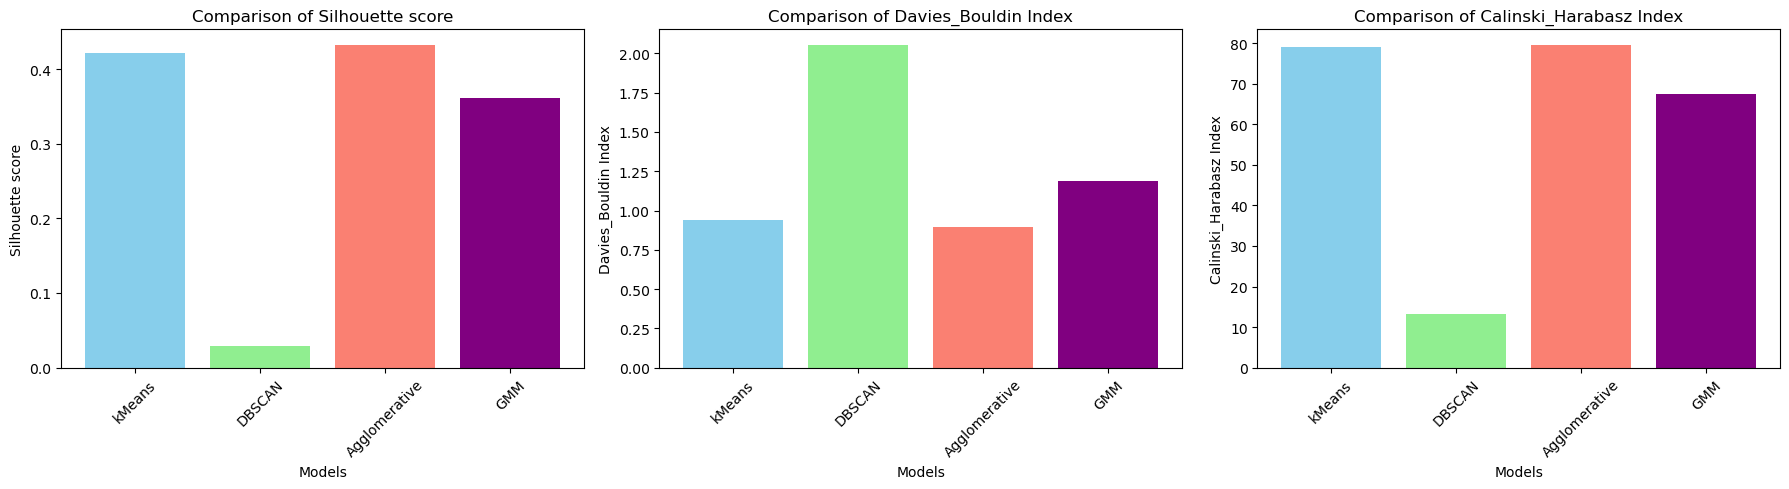

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create your data sets and put them into a DataFrame
eval_data = {
    "Models": ['kMeans', 'DBSCAN', 'Agglomerative', 'GMM'],
    "Silhouette score": [km_silhouette, db_silhouette, am_silhouette, gmm_silhouette],
    "Davies_Bouldin Index": [km_davies_bouldin, db_davies_bouldin, am_davies_bouldin, gmm_davies_bouldin],
    "Calinski_Harabasz Index": [km_calinski_harabasz, db_calinski_harabasz, am_calinski_harabasz, gmm_calinski_harabasz]
}

edf = pd.DataFrame(eval_data)
display(edf)  # Show the DataFrame

# Define metrics to plot
metrics = ["Silhouette score", "Davies_Bouldin Index", "Calinski_Harabasz Index"]

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(edf["Models"], edf[metric], color=['skyblue', 'lightgreen', 'salmon', 'purple'])
    ax.set_title(f'Comparison of {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel("Models")
    ax.set_xticks(np.arange(len(edf["Models"])))
    ax.set_xticklabels(edf["Models"], rotation=45)

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


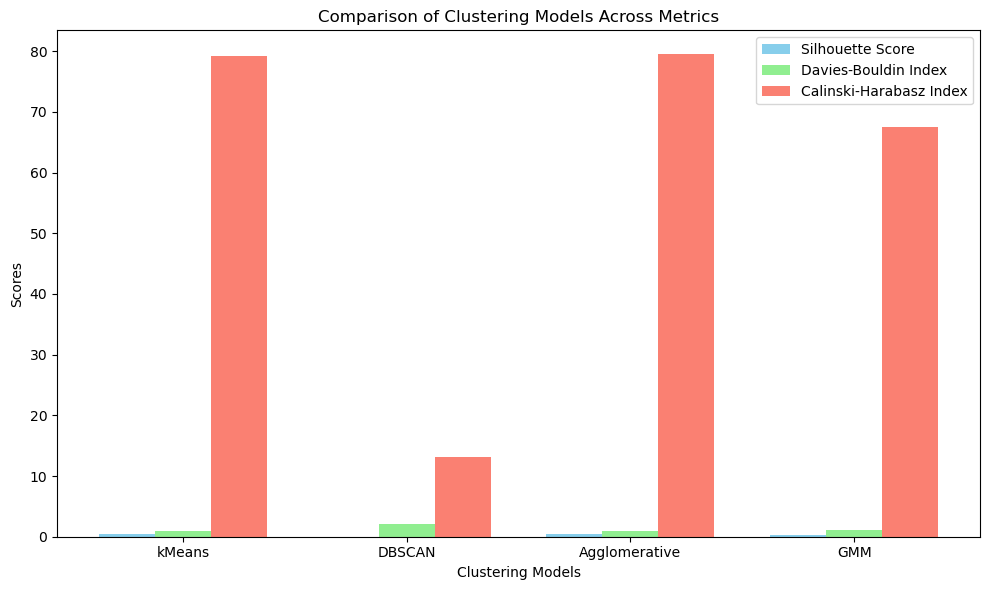

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# X-axis positions for models
x = np.arange(len(edf["Models"]))  
width = 0.25  # Width of each bar

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as grouped bars
bars1 = ax.bar(x - width, edf["Silhouette score"], width, label="Silhouette Score", color="skyblue")
bars2 = ax.bar(x, edf["Davies_Bouldin Index"], width, label="Davies-Bouldin Index", color="lightgreen")
bars3 = ax.bar(x + width, edf["Calinski_Harabasz Index"], width, label="Calinski-Harabasz Index", color="salmon")

# Adding labels, title, and legend
ax.set_xlabel("Clustering Models")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Clustering Models Across Metrics")
ax.set_xticks(x)
ax.set_xticklabels(edf["Models"])
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


What is Clustering?
Clustering is an unsupervised learning technique in machine learning where data points are grouped into clusters based on their similarities. Unlike classification, clustering does not require labeled data; instead, the algorithm identifies patterns and structures in the dataset.

For example, in customer segmentation, clustering can group customers based on purchasing behavior without prior knowledge of predefined categories.

Types of Clustering
1️⃣ Partition-Based Clustering
Divides the dataset into k clusters, where each data point belongs to one cluster.

Example: K-Means Clustering (one of the most popular algorithms).

2️⃣ Hierarchical Clustering
Forms a tree-like structure (dendrogram) where clusters are formed step-by-step, either bottom-up (agglomerative) or top-down (divisive).

Example: Agglomerative Hierarchical Clustering.

3️⃣ Density-Based Clustering
Groups together dense regions of data and identifies outliers.

Example: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is good for finding clusters of varying shapes.

4️⃣ Distribution-Based Clustering
Assumes data is generated from a mix of different probability distributions and groups them accordingly.

Example: Gaussian Mixture Models (GMM).

5️⃣ Fuzzy Clustering
Assigns probabilities to each data point for belonging to different clusters instead of a hard assignment.

Example: Fuzzy C-Means Clustering.

Common Clustering Algorithms
🔹 K-Means – Simple and efficient for well-separated clusters.
🔹 DBSCAN – Works well for irregularly shaped clusters and handles noise.
🔹 Hierarchical Clustering – Produces a dendrogram to visualize clusters.
🔹 Gaussian Mixture Model (GMM) – Uses probability distributions for clustering.
🔹 Mean Shift – Determines the number of clusters dynamically.

Applications of Clustering
📌 Customer Segmentation – Grouping customers based on purchasing behavior.
📌 Anomaly Detection – Identifying fraudulent transactions or network intrusions.
📌 Image Segmentation – Dividing images into meaningful segments.
📌 Document Clustering – Grouping similar articles or research papers.
📌 Genomic Data Analysis – Identifying genetic similarities.

Difference Between Clustering and Classification

Feature	            Clustering 🌀	     Classification ✅
Type of Learning	Unsupervised	      Supervised
Labels Available?	No	                  Yes
Goal	            Group similar data	  Assign predefined labels
Example	            Grouping customers	  Predicting spam emails

Conclusion
Clustering is a powerful tool for pattern recognition and data exploration, helping in segmenting data where predefined categories are unknown. It is widely used in marketing, biology, anomaly detection, and many other fields! 🚀